In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [53]:
data = pd.read_csv('C:/Users/admin/Videos/M&M.csv', usecols=(0,7), parse_dates=[0], index_col=[0])

In [54]:
data.head(3)

,Close
Date,
2020-01-02,539.85
2020-01-01,536.60
2019-12-31,531.55


In [55]:
mm = data[::-1]

In [56]:
mm[0:180]

,Close
Date,
2019-01-11,727.90
2019-01-14,724.55
2019-01-15,726.90
2019-01-16,726.25
2019-01-17,734.65
...,...
2019-09-30,547.15
2019-10-01,556.70
2019-10-03,562.70


In [61]:
train = mm.loc[:'2019-10-07',:]['Close']
test = mm.loc['2019-10-08':, :]['Close']

print(test.shape)
print(train.shape)

(59,)
(180,)


In [68]:
x_train = []
y_train = []

for i in range(10, len(train)-10):
    x_train.append(train[i-10:i])
    y_train.append(train[i:i+10])
    
x_train = np.array(x_train)
y_train = np.array(y_train)


x_test = []
y_test = []

for i in range(10, len(test)-10):
    x_test.append(test[i-10:i])
    y_test.append(test[i:i+10])
    
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test.shape)

(39, 10)


In [65]:
x_train.shape, y_train.shape

((160, 10), (160, 10))

In [95]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x_train_scale = x_scaler.fit_transform(x_train)
y_train_scale = y_scaler.fit_transform(y_train)
x_test_scale = x_scaler.fit_transform(x_test)
y_test_scale = y_scaler.fit_transform(y_test)

In [96]:
x_train_scale_shaped = x_train_scale.reshape(160,10,1)
x_test_scale_shaped = x_test_scale.reshape(39,10,1)
y_test_scale_shaped = y_test_scale.reshape(39,10,1)

In [116]:
reg = Sequential()

reg.add(LSTM(units=160, activation='relu', return_sequences=True, input_shape=(10,1)))


reg.add(Dense(10))

In [117]:
reg.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [118]:
reg.fit(x_train_scale_shaped, y_train_scale, epochs=200, batch_size=10)

Train on 160 samples
Epoch 1/200
160/160 [==============================] - 2s 15ms/sample - loss: 0.3655 - accuracy: 0.0694
Epoch 2/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.2128 - accuracy: 0.1300
Epoch 3/200
160/160 [==============================] - 0s 1ms/sample - loss: 0.1666 - accuracy: 0.1850
Epoch 4/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.1431 - accuracy: 0.2013
Epoch 5/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.1217 - accuracy: 0.1175
Epoch 6/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.1161 - accuracy: 0.2087
Epoch 7/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.1063 - accuracy: 0.1663
Epoch 8/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0994 - accuracy: 0.1650
Epoch 9/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0910 - accuracy: 0.1656
Epoch 10/200
160/160 [=============================

160/160 [==============================] - 0s 2ms/sample - loss: 0.0792 - accuracy: 0.2281
Epoch 72/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0803 - accuracy: 0.2225
Epoch 73/200
160/160 [==============================] - 0s 1ms/sample - loss: 0.0811 - accuracy: 0.2156
Epoch 74/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0797 - accuracy: 0.1756
Epoch 75/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0798 - accuracy: 0.2181
Epoch 76/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0804 - accuracy: 0.2231
Epoch 77/200
160/160 [==============================] - 0s 1ms/sample - loss: 0.0803 - accuracy: 0.1844
Epoch 78/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0805 - accuracy: 0.2044
Epoch 79/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0805 - accuracy: 0.2194
Epoch 80/200
160/160 [==============================] - 0s 2ms/sample - loss:

160/160 [==============================] - 0s 2ms/sample - loss: 0.0806 - accuracy: 0.1850
Epoch 149/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0801 - accuracy: 0.2212
Epoch 150/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0796 - accuracy: 0.2231
Epoch 151/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0805 - accuracy: 0.2212
Epoch 152/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0806 - accuracy: 0.2369
Epoch 153/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0796 - accuracy: 0.2481
Epoch 154/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0808 - accuracy: 0.2131
Epoch 155/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0819 - accuracy: 0.1719
Epoch 156/200
160/160 [==============================] - 0s 2ms/sample - loss: 0.0803 - accuracy: 0.2275
Epoch 157/200
160/160 [==============================] - 0s 2ms/sampl

In [119]:
y_pred = reg.predict(x_test_scale_shaped)

In [100]:
def evaluate_model(y_test_scale, y_pred):
    scores=[]
    
    for i in range(y_test_scale.shape[1]):
        mse = mean_squared_error(y_test_scale[:,i], y_pred[:,i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
        
    return scores

In [101]:
evaluate_model(y_test_scale, y_pred)

[0.10484750844901623,
 0.12123130113762268,
 0.1315670212140271,
 0.1402490115380506,
 0.14769400105324285,
 0.14449998919665505,
 0.16463379998858932,
 0.17848436418514815,
 0.1964119511045868,
 0.20672381540374532]

In [150]:
print(np.std(y_test_scale[:,:1]))
#print(np.std(y_test_scale[2]))
#print(np.std(y_test_scale[3]))
#print(np.std(y_test_scale[4]))
#print(np.std(y_test_scale[5]))
#print(np.std(y_test_scale[6]))
#print(np.std(y_test_scale[7]))
#print(np.std(y_test_scale[8]))
#print(np.std(y_test_scale[9]))

0.2938807778873313


In [151]:
true_value=pd.DataFrame(y_test_scale[:, :1])

In [152]:
predicted_value = pd.DataFrame(y_pred[:, :1])

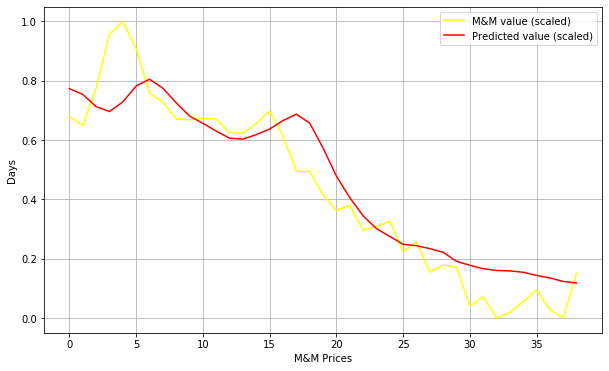

In [158]:
plt.figure(figsize=(10,6))
plt.plot(true_value, label='M&M value (scaled)', color='yellow')
plt.plot(predicted_value, label='Predicted value (scaled)', color='red')
plt.legend()
plt.xlabel('M&M Prices')
plt.ylabel('Days')
plt.grid()
plt.show()

In [154]:
AI_model = pd.concat([true_value, predicted_value], 1)

In [155]:
AI_model.to_excel("C:/Users/admin/Videos/AI_model_prediction.xlsx")

In [149]:
pd.DataFrame(y_test_scale[:,:1])

,0
0,0.679603
1,0.649368
2,0.773917
3,0.957130
4,1.000000
5,0.908845
6,0.758123
7,0.727888
8,0.671480
9,0.668321


In [166]:
pd.DataFrame(x_test[10:,:1])

,0
0,581.05
1,577.70
2,591.50
3,611.80
4,616.55
5,606.45
6,589.75
7,586.40
8,580.15
9,579.80


In [169]:
pd.DataFrame(y_test[0:, :1])

,0
0,581.05
1,577.70
2,591.50
3,611.80
4,616.55
5,606.45
6,589.75
7,586.40
8,580.15
9,579.80
